In [3]:
import duckdb
from PIL import Image
from core_pro.ultilities import make_sync_folder
import supervision as sv
from create_index import create_search_result

In [2]:
path = make_sync_folder("dataset/item_matching")
file = path / "data_sample_FMCG_clean.parquet"

query = f"""
select
item_id
, item_name
, item_name_clean
, level1_global_be_category
, file_path
from read_parquet('{file}')
limit 10000
"""
df = duckdb.sql(query).pl()
df.to_dicts()[:2]

[{'item_id': 24383601703,
  'item_name': 'KHĂN TẨY TRANG MENOW  AVOCADO CLEANSING WIPES (30 miếng)',
  'item_name_clean': 'khăn tẩy trang menow avocado cleansing wipes',
  'level1_global_be_category': 'Beauty',
  'file_path': '/Users/kevinkhang/Downloads/Data/dataset/item_matching/img/img_/batch_0_to_999/0.jpg'},
 {'item_id': 22671636316,
  'item_name': 'Sữa chua trái cây Hoff 55g',
  'item_name_clean': 'sữa chua trái cây hoff 55g',
  'level1_global_be_category': 'Food & Beverages',
  'file_path': '/Users/kevinkhang/Downloads/Data/dataset/item_matching/img/img_/batch_0_to_999/1.jpg'}]

In [9]:
images = [Image.open(i["file_path"]).convert("RGB") for i in df.to_dicts()]
titles = [i["item_name_clean"] for i in df.to_dicts()]

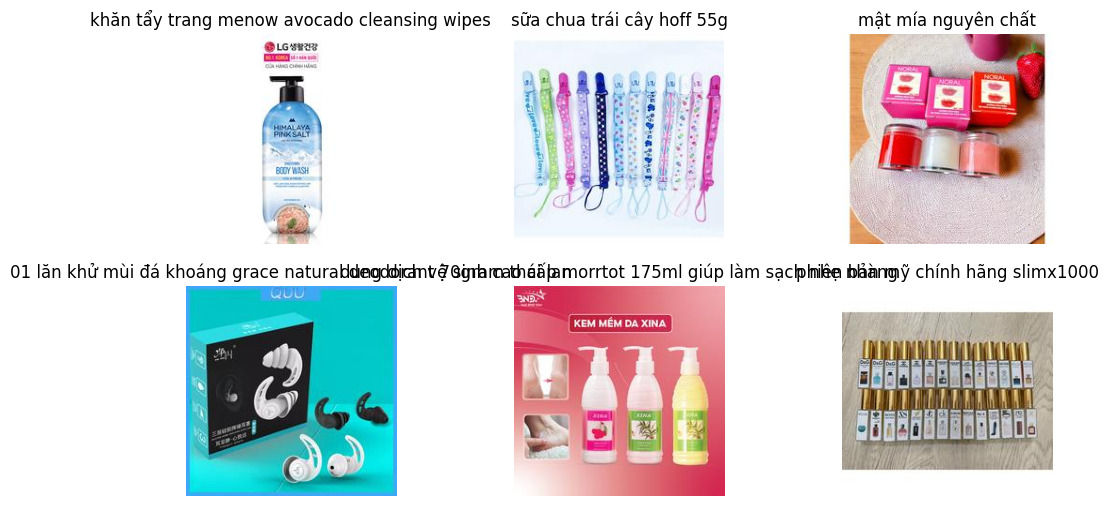

In [13]:
sv.plot_images_grid(images[:6], titles=titles[:6], grid_size=(2, 3), size=(12, 6))

In [ ]:
file_embed = path / "bge_encode.npy"
df_match_bge = create_search_result(path=path, file_embed=file_embed, data=df)